Boucle globale de lecture de vidéo


state= 0
    img_calibration
    obstacle detection
    start and goal
    global_nav
    
state = 1
    img_calibration
    detect Thymio
    astolfi ou local nav
    
    

In [1]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

#vérifier d'avoir installer pyserial

Node eb16048f-962c-44b2-9651-cc3b67bca83b

# Initialisation

In [2]:
#check each import if it's really necessary
import cv2 
import time
import numpy as np
from PIL import Image 
import math
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

#import from global control
#import from glocal + control
import pyvisgraph as vg
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point, LineString
import time

In [3]:
import Vision as vis
import Global as glob
import control as ctrl
import local_nav as local

# fonction et classe filtering
from kalman_step_astolfi import kalman_step_complet
from EKF_astolfi import ExtendedKalmanFilterAstolfi

In [4]:
#pour le test utilise une image mais en vrai relier à la caméra et temps réel

cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()


#img_final= cv2.flip(img_final, 0)
img_final2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
corner_coord=vis.find_corners(img_final2)
img=vis.img_calibration(img_final2,corner_coord)
#cv2.imwrite('warpped.png', zzz)
plt.figure()
plt.imshow(img)
plt.show()



frame 0


KeyboardInterrupt: 

In [ ]:
#obstacle detection
polygons=vis.obstacle_detection(img)
#Start and goal detection
start=vis.detectCircle(img,'start')
goal=vis.detectCircle(img,'goal')

In [ ]:
#plot the visibility graph

#a voir si on le met dedans
margin = 35
path=glob.global_pathplanning(start,goal,polygons,margin)


# Control and navigation loop

In [ ]:
#cap=cv2.VideoCapture(0)

In [ ]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()
    
#frame=vis.img_calibration(frame)
    
plt.figure()
plt.imshow(frame)
plt.show()

In [ ]:
#img_final = cv2.imread(frame)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#img= cv2.flip(img, 0)
final=vis.img_calibration(img)
plt.figure()
plt.imshow(final)
plt.show()

In [4]:
def initialisation(pic):
    #obstacle detection
    polygons=vis.obstacle_detection(pic)
    #Start and goal detection
    start=vis.detectCircle(pic,'start')
    goal=vis.detectCircle(pic,'goal')
    init=[start,goal,polygons]
    return init



In [5]:
def printThymio(posThym, coordThym):
    coordThym.append((round(pos_thym[0]),round(pos_thym[1]))) #pos_thym = [x,y]
    for i in range(0,len(coordThym)):
        cv2.circle(final,(int(coordThym[i][0]),int(coordThym[i][1])), int(3), (0,255,255), 2)

In [6]:
def printThymioKalm(posThym, coordThym):    #la couleur de la trace change
 #   print("print dans thymkalm")
 #   print(posThym[0])
 #   print("prochain round: ")
 #   print(round(posThym[0]))
    coordThym.append((round(posThym[0]),round(posThym[1]))) #pos_thym = [x,y]
    for i in range(0,len(coordThym)):
        cv2.circle(final,(int(coordThym[i][0]),int(coordThym[i][1])), int(3), (0,0,255), 2)

In [7]:
#convertir frame to real => mm/s vitesse et position

#coefficients for the Astolfi controller (distances in millimeter)
r=22
l=48 
kp=25  #2 #>0
ka=50  #must be > kp
kb=-0.0001 #<0

#coeff_commtoreal=0,38

#astolfi return to iterate on the next goal from the path list

def astolfi(actual_pos, goal_pos, actual_angle, node):
    #déplacer les variables à l'extérieur dans control
    switch_next=0
    thresh_close2=10
    thresh_close1=75
    comm_sat_min=100
    comm_sat_max=250
    
    delta=np.subtract(goal_pos,actual_pos)
    pho=np.sqrt(np.sum(np.square(delta)))
    alpha=-actual_angle + np.arctan2(-delta[1],delta[0])
    beta=-actual_angle-alpha
    v=kp*pho
    if(pho<thresh_close1):
        v=comm_sat_min*r
    if(pho<thresh_close2):
        v=0
        switch_next=1      
    omega=ka*alpha+kb*beta
    #omega=0
    right_speed=(l*omega+v)/r
    left_speed=(v-l*omega)/r
    left_speed=int(left_speed)
    right_speed=int(right_speed)
    ctrl.set_motors(left_speed, right_speed, node)
    return switch_next

In [8]:
def printGlobalPath(path, img):
    lineThickness = 3
    for i in range(0,len(path)-1):
        cv2.line(final, (round(path[i][0]), round(path[i][1])),(round(path[i+1][0]), round(path[i+1][1])), (0,255,0), lineThickness)

In [9]:
print(angle_thym)

NameError: name 'angle_thym' is not defined

frame 0
frame 1
frame 2
frame 3
frame 4


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.53it/s]


Visibility graph points:  [[Point(386.32, 243.63), Point(388.69, 381.62), Point(532.68, 379.37), Point(530.31, 241.38)], [Point(343.79, -16.67), Point(234.60, 69.28), Point(325.99, 176.66), Point(439.77, 90.74)]] 

Shortest path distance: 527.9442761431466 

0    POLYGON ((386.315 243.631, 388.694 381.619, 53...
1    POLYGON ((343.786 -16.675, 234.604 69.277, 325...
0                              POINT (103.040 343.553)
1                               POINT (541.290 49.169)
dtype: geometry 

path  0    POINT (103.040 343.553)
1     POINT (541.290 49.169)
dtype: geometry
elements:  2
elements:  2


différence d'angle correcte
Vitesses droite / gauche -------------------
0.0
0.0
--------------------------------------------
temps entre samples:  0.24950671195983887
state avant predict
[[103.03982544]
 [343.55310059]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
state apres predict
[[103.03982544]
 [343.55310059]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.043935694971434444
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
0.0
0.0
--------------------------------------------
temps entre samples:  0.1495978832244873
state avant predict
[[8.13834666e+01]
 [2.81230411e+02]
 [3.53620520e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]
state apres predict
[[8.13834

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.426652828576513
13.383889288375766
--------------------------------------------
temps entre samples:  0.13743948936462402
state avant predict
[[ 9.46387236e+01]
 [ 2.77600568e+02]
 [ 1.74035639e-02]
 [ 1.34266528e+01]
 [ 1.33838893e+01]
 [ 1.33265110e+01]
 [-1.24318617e+00]
 [ 5.43029082e-04]]
state apres predict
[[ 9.64703124e+01]
 [ 2.77429705e+02]
 [ 1.74781976e-02]
 [ 1.34266528e+01]
 [ 1.33838893e+01]
 [ 1.33991810e+01]
 [-4.66551876e-01]
 [ 4.75150447e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.050179894726366726
<class 'numpy.float64'>
failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.368763226256995
13.481365958527569
--------------------------------------------
temps entre samples:  0.148040771484375
state avant predict
[[ 9.65683

elements:  1
elements:  1
thymio indetectable
Vitesses droite / gauche -------------------
13.29363152863203
13.45305294275811
--------------------------------------------
temps entre samples:  0.13484597206115723
state avant predict
[[ 1.13887572e+02]
 [ 2.73671989e+02]
 [ 9.95028654e-02]
 [ 1.32936315e+01]
 [ 1.34530529e+01]
 [ 1.32085604e+01]
 [-2.67040085e+00]
 [-1.00936476e-03]]
state apres predict
[[ 1.15668693e+02]
 [ 2.73311896e+02]
 [ 9.93667567e-02]
 [ 1.32936315e+01]
 [ 1.34530529e+01]
 [ 1.31750046e+01]
 [-2.65259501e+00]
 [-1.77134905e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 1.15668693e+02]
 [ 2.73311896e+02]
 [ 9.93667567e-02]
 [ 1.32936315e+01]
 [ 1.34530529e+01]
 [ 1.31750046e+01]
 [-2.65259501e+00]
 [-1.77134905e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 1.15667137e+02]
 [ 2.73312011e+02]
 [ 9.93308432e-02]
 [ 1.32492202e+01]
 [ 1.34523862e+01]
 [ 1.31653388e+01]
 [-2.65140889e+00]
 [-1.98146729e-03]]
angle from camera: 

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.34382408832221
13.493015272751808
--------------------------------------------
temps entre samples:  0.14755845069885254
state avant predict
[[ 1.30742983e+02]
 [ 2.70306809e+02]
 [ 9.76382945e-02]
 [ 1.33438241e+01]
 [ 1.34930153e+01]
 [ 1.33051782e+01]
 [-2.63517477e+00]
 [-7.82026321e-04]]
state apres predict
[[ 1.32706275e+02]
 [ 2.69917967e+02]
 [ 9.75228999e-02]
 [ 1.33438241e+01]
 [ 1.34930153e+01]
 [ 1.32267922e+01]
 [-2.61198252e+00]
 [-1.65767983e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 1.32706275e+02]
 [ 2.69917967e+02]
 [ 9.75228999e-02]
 [ 1.33438241e+01]
 [ 1.34930153e+01]
 [ 1.32267922e+01]
 [-2.61198252e+00]
 [-1.65767983e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 1.32702218e+02]
 [ 2.69918349e+02]
 [ 9.75576446e-02]
 [ 1.32697687e+01]
 [ 1.33267547e+01]
 [ 1.31810979e+01]
 [-2.60767786e+00]
 [-1.26635470e-03]]
angle from camera:

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.548745759373643
13.641295796932594
--------------------------------------------
temps entre samples:  0.13635706901550293
state avant predict
[[ 1.45771867e+02]
 [ 2.67329958e+02]
 [ 9.80624689e-02]
 [ 1.35487458e+01]
 [ 1.36412958e+01]
 [ 1.33144496e+01]
 [-2.64613130e+00]
 [-2.05666750e-03]]
state apres predict
[[ 1.47587386e+02]
 [ 2.66969139e+02]
 [ 9.77820278e-02]
 [ 1.35487458e+01]
 [ 1.36412958e+01]
 [ 1.33991829e+01]
 [-2.65778209e+00]
 [-1.02833375e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 1.47587386e+02]
 [ 2.66969139e+02]
 [ 9.77820278e-02]
 [ 1.35487458e+01]
 [ 1.36412958e+01]
 [ 1.33991829e+01]
 [-2.65778209e+00]
 [-1.02833375e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 1.47584493e+02]
 [ 2.66969416e+02]
 [ 9.78029241e-02]
 [ 1.34889536e+01]
 [ 1.35243046e+01]
 [ 1.33655715e+01]
 [-2.65458821e+00]
 [-7.85577082e-04]]
angle from camera

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.351149633495963
13.430724031654975
--------------------------------------------
temps entre samples:  0.13751626014709473
state avant predict
[[ 1.54031351e+02]
 [ 2.77591500e+02]
 [ 3.05242495e-02]
 [ 1.33511496e+01]
 [ 1.34307240e+01]
 [ 1.33707093e+01]
 [-5.61870553e-01]
 [-1.01046855e-03]]
state apres predict
[[ 1.55870041e+02]
 [ 2.77514234e+02]
 [ 3.03852936e-02]
 [ 1.33511496e+01]
 [ 1.34307240e+01]
 [ 1.33722242e+01]
 [-8.17242716e-01]
 [-8.84159980e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.016660312729515864
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.445829164494167
13.570869921092237
--------------------------------------------
temps entre samples:  0.14679598808288574
state avant predict
[[ 1.55778977e+02]
 [ 2.77288335e+02]
 

elements:  1
elements:  1
thymio indetectable
Vitesses droite / gauche -------------------
13.420262328911878
13.62718301208098
--------------------------------------------
temps entre samples:  0.1496438980102539
state avant predict
[[ 1.71544983e+02]
 [ 2.76810308e+02]
 [ 6.27601939e-02]
 [ 1.34202623e+01]
 [ 1.36271830e+01]
 [ 1.34023590e+01]
 [-1.68382296e+00]
 [-2.06490407e-03]]
state apres predict
[[ 1.73550564e+02]
 [ 2.76558334e+02]
 [ 6.24511936e-02]
 [ 1.34202623e+01]
 [ 1.36271830e+01]
 [ 1.34438647e+01]
 [-1.69527484e+00]
 [-2.29911870e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 1.73550564e+02]
 [ 2.76558334e+02]
 [ 6.24511936e-02]
 [ 1.34202623e+01]
 [ 1.36271830e+01]
 [ 1.34438647e+01]
 [-1.69527484e+00]
 [-2.29911870e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 1.73557655e+02]
 [ 2.76557922e+02]
 [ 6.24449591e-02]
 [ 1.35808970e+01]
 [ 1.38008543e+01]
 [ 1.35077698e+01]
 [-1.69925015e+00]
 [-2.35460540e-03]]
angle from camera: 

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.82079421166794
13.679705685975055
--------------------------------------------
temps entre samples:  0.1371603012084961
state avant predict
[[ 1.87642000e+02]
 [ 2.74797226e+02]
 [ 6.21404014e-02]
 [ 1.38207942e+01]
 [ 1.36797057e+01]
 [ 1.36273802e+01]
 [-1.69835464e+00]
 [ 6.01967238e-04]]
state apres predict
[[ 1.89511136e+02]
 [ 2.74564279e+02]
 [ 6.22229674e-02]
 [ 1.38207942e+01]
 [ 1.36797057e+01]
 [ 1.36706492e+01]
 [-1.70669315e+00]
 [ 1.56765029e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 1.89511136e+02]
 [ 2.74564279e+02]
 [ 6.22229674e-02]
 [ 1.38207942e+01]
 [ 1.36797057e+01]
 [ 1.36706492e+01]
 [-1.70669315e+00]
 [ 1.56765029e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 1.89509703e+02]
 [ 2.74564383e+02]
 [ 6.21909117e-02]
 [ 1.37337786e+01]
 [ 1.36798876e+01]
 [ 1.36541083e+01]
 [-1.70548945e+00]
 [ 1.19757825e-03]]
angle from camera: 

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.678273893894803
13.661835908992503
--------------------------------------------
temps entre samples:  0.13750696182250977
state avant predict
[[ 2.04902549e+02]
 [ 2.72640125e+02]
 [ 6.19824061e-02]
 [ 1.36782739e+01]
 [ 1.36618359e+01]
 [ 1.35817702e+01]
 [-1.68743288e+00]
 [ 3.65288553e-04]]
state apres predict
[[ 2.06770137e+02]
 [ 2.72408091e+02]
 [ 6.20326358e-02]
 [ 1.36782739e+01]
 [ 1.36618359e+01]
 [ 1.35913201e+01]
 [-1.69243629e+00]
 [ 1.82644277e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 2.06770137e+02]
 [ 2.72408091e+02]
 [ 6.20326358e-02]
 [ 1.36782739e+01]
 [ 1.36618359e+01]
 [ 1.35913201e+01]
 [-1.69243629e+00]
 [ 1.82644277e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 2.06765745e+02]
 [ 2.72408318e+02]
 [ 6.21311318e-02]
 [ 1.36793407e+01]
 [ 1.33912384e+01]
 [ 1.35399111e+01]
 [-1.68976537e+00]
 [ 1.33560556e-03]]
angle from camera

elements:  2
elements:  2
Vitesses droite / gauche -------------------
13.538138813818078
13.489678876880557
--------------------------------------------
temps entre samples:  0.1355421543121338
state avant predict
[[ 2.11827311e+02]
 [ 2.76603267e+02]
 [ 1.83927957e-02]
 [ 1.35381388e+01]
 [ 1.34896789e+01]
 [ 1.34777904e+01]
 [-1.33576026e+00]
 [ 6.15364279e-04]]
state apres predict
[[ 2.13654120e+02]
 [ 2.76422215e+02]
 [ 1.84762035e-02]
 [ 1.35381388e+01]
 [ 1.34896789e+01]
 [ 1.35070516e+01]
 [-4.97061072e-01]
 [ 5.38443744e-04]]
dans test de distance
bonne distance detectee, update
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 2.13654120e+02]
 [ 2.76422215e+02]
 [ 1.84762035e-02]
 [ 1.35381388e+01]
 [ 1.34896789e+01]
 [ 1.35070516e+01]
 [-4.97061072e-01]
 [ 5.38443744e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 2.13650984e+02]
 [ 2.76422334e+02]
 [ 1.81502930e-02]
 [ 1.32994215e+01]
 [ 1.36343953e+01]
 [ 1.34749791e+01]
 [-4.95707024e-01]
 [-2

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.767989492554278
13.745211333131756
--------------------------------------------
temps entre samples:  0.15114212036132812
state avant predict
[[ 2.30250978e+02]
 [ 2.77160272e+02]
 [ 3.87774278e-02]
 [ 1.37679895e+01]
 [ 1.37452113e+01]
 [ 1.37635281e+01]
 [ 5.38840122e-01]
 [-7.26582930e-05]]
state apres predict
[[ 2.32331227e+02]
 [ 2.77241713e+02]
 [ 3.87664461e-02]
 [ 1.37679895e+01]
 [ 1.37452113e+01]
 [ 1.37255784e+01]
 [-1.06635646e+00]
 [ 2.53090660e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.03814453152314658
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.73124266788905
13.655990985106905
--------------------------------------------
temps entre samples:  0.13653063774108887
state avant predict
[[ 2.31873371e+02]
 [ 2.76888062e+02]
 [ 

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.500250763584665
13.465680488831046
--------------------------------------------
temps entre samples:  0.13891911506652832
state avant predict
[[ 2.52874472e+02]
 [ 2.69759912e+02]
 [-6.45156616e-02]
 [ 1.35002508e+01]
 [ 1.34656805e+01]
 [ 1.34297679e+01]
 [ 1.74011627e+00]
 [ 7.68228328e-04]]
state apres predict
[[ 2.54740124e+02]
 [ 2.70001648e+02]
 [-6.44089400e-02]
 [ 1.35002508e+01]
 [ 1.34656805e+01]
 [ 1.33988347e+01]
 [ 1.73731191e+00]
 [ 3.84114164e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 2.54740124e+02]
 [ 2.70001648e+02]
 [-6.44089400e-02]
 [ 1.35002508e+01]
 [ 1.34656805e+01]
 [ 1.33988347e+01]
 [ 1.73731191e+00]
 [ 3.84114164e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 2.54739441e+02]
 [ 2.70001613e+02]
 [-6.44174885e-02]
 [ 1.34704272e+01]
 [ 1.34572247e+01]
 [ 1.33915329e+01]
 [ 1.73689045e+00]
 [ 2.93390226e-04]]
angle from camera

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.670585791277706
13.534241186650478
--------------------------------------------
temps entre samples:  0.13597440719604492
state avant predict
[[ 2.68005539e+02]
 [ 2.71726239e+02]
 [-6.53465151e-02]
 [ 1.36705858e+01]
 [ 1.35342412e+01]
 [ 1.35513962e+01]
 [ 1.78160610e+00]
 [ 4.96546769e-04]]
state apres predict
[[ 2.69848182e+02]
 [ 2.71968492e+02]
 [-6.52789974e-02]
 [ 1.36705858e+01]
 [ 1.35342412e+01]
 [ 1.35153383e+01]
 [ 1.77521103e+00]
 [ 1.51494005e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 2.69848182e+02]
 [ 2.71968492e+02]
 [-6.52789974e-02]
 [ 1.36705858e+01]
 [ 1.35342412e+01]
 [ 1.35153383e+01]
 [ 1.77521103e+00]
 [ 1.51494005e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 2.69847442e+02]
 [ 2.71968480e+02]
 [-6.53612231e-02]
 [ 1.35354923e+01]
 [ 1.36243251e+01]
 [ 1.35067316e+01]
 [ 1.77509207e+00]
 [ 5.59272341e-04]]
angle from camera

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.44053873725708
13.605551710075119
--------------------------------------------
temps entre samples:  0.13506102561950684
state avant predict
[[ 2.83200825e+02]
 [ 2.73728247e+02]
 [-6.53473539e-02]
 [ 1.34405387e+01]
 [ 1.36055517e+01]
 [ 1.33935837e+01]
 [ 1.76091436e+00]
 [-1.13362162e-03]]
state apres predict
[[ 2.85009776e+02]
 [ 2.73966078e+02]
 [-6.55004620e-02]
 [ 1.34405387e+01]
 [ 1.36055517e+01]
 [ 1.34364759e+01]
 [ 1.76487550e+00]
 [-1.83347748e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 2.85009776e+02]
 [ 2.73966078e+02]
 [-6.55004620e-02]
 [ 1.34405387e+01]
 [ 1.36055517e+01]
 [ 1.34364759e+01]
 [ 1.76487550e+00]
 [-1.83347748e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 2.85010633e+02]
 [ 2.73966141e+02]
 [-6.55144647e-02]
 [ 1.34476222e+01]
 [ 1.36515633e+01]
 [ 1.34465896e+01]
 [ 1.76561161e+00]
 [-1.99869103e-03]]
angle from camera:

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.518217932492803
13.610740311564658
--------------------------------------------
temps entre samples:  0.13457226753234863
state avant predict
[[ 2.88622415e+02]
 [ 2.75521247e+02]
 [ 2.72717042e-02]
 [ 1.35182179e+01]
 [ 1.36107403e+01]
 [ 1.35129424e+01]
 [-9.77247532e-01]
 [-8.12982591e-04]]
state apres predict
[[ 2.90440882e+02]
 [ 2.75389736e+02]
 [ 2.71622993e-02]
 [ 1.35182179e+01]
 [ 1.36107403e+01]
 [ 1.35493479e+01]
 [-7.39669515e-01]
 [-1.02802643e-03]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.017581920169367313
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.648257778380863
13.573180048947998
--------------------------------------------
temps entre samples:  0.13819313049316406
state avant predict
[[ 2.89461985e+02]
 [ 2.74596338e+02]
 

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.588327330062468
13.547298175001973
--------------------------------------------
temps entre samples:  0.14844918251037598
state avant predict
[[ 3.05894522e+02]
 [ 2.75570438e+02]
 [ 8.06357277e-03]
 [ 1.35883273e+01]
 [ 1.35472982e+01]
 [ 1.34857645e+01]
 [-1.35804431e+00]
 [-2.02804380e-04]]
state apres predict
[[ 3.07896473e+02]
 [ 2.75368837e+02]
 [ 8.03346663e-03]
 [ 1.35883273e+01]
 [ 1.35472982e+01]
 [ 1.35664895e+01]
 [-2.18805349e-01]
 [ 4.55879501e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: -7.591921727431512e-05
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.530482913549537
13.638378582561316
--------------------------------------------
temps entre samples:  0.13656139373779297
state avant predict
[[ 3.08743269e+02]
 [ 2.75495969e+02]

elements:  0
elements:  0
thymio indetectable
Vitesses droite / gauche -------------------
13.501231656406938
13.838411999731049
--------------------------------------------
temps entre samples:  0.13605332374572754
state avant predict
[[ 3.26155958e+02]
 [ 2.75041322e+02]
 [-2.83016286e-02]
 [ 1.35012317e+01]
 [ 1.38384120e+01]
 [ 1.36434507e+01]
 [ 7.68049273e-01]
 [-2.42622985e-03]]
state apres predict
[[ 3.28012195e+02]
 [ 2.75145818e+02]
 [-2.86317252e-02]
 [ 1.35012317e+01]
 [ 1.38384120e+01]
 [ 1.36533997e+01]
 [ 7.73549865e-01]
 [-3.74644826e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 3.28012195e+02]
 [ 2.75145818e+02]
 [-2.86317252e-02]
 [ 1.35012317e+01]
 [ 1.38384120e+01]
 [ 1.36533997e+01]
 [ 7.73549865e-01]
 [-3.74644826e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 3.28009682e+02]
 [ 2.75145729e+02]
 [-2.86020233e-02]
 [ 1.34707860e+01]
 [ 1.37404471e+01]
 [ 1.36288264e+01]
 [ 7.72655902e-01]
 [-3.45913537e-03]]
angle from camera

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.404700815894978
13.450010049255235
--------------------------------------------
temps entre samples:  0.14847326278686523
state avant predict
[[ 3.39319436e+02]
 [ 2.76764530e+02]
 [ 4.12391127e-02]
 [ 1.34047008e+01]
 [ 1.34500100e+01]
 [ 1.33936219e+01]
 [-6.12171189e-01]
 [-2.13450582e-04]]
state apres predict
[[ 3.41308031e+02]
 [ 2.76673639e+02]
 [ 4.12074210e-02]
 [ 1.34047008e+01]
 [ 1.34500100e+01]
 [ 1.33931104e+01]
 [-1.10683672e+00]
 [-5.03435926e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.01845070461025533
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.497889404590437
13.458193585968313
--------------------------------------------
temps entre samples:  0.13717365264892578
state avant predict
[[ 3.41395260e+02]
 [ 2.76025855e+02]
 [

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
13.468262498269834
13.5196283091279
--------------------------------------------
temps entre samples:  0.14928770065307617
state avant predict
[[ 3.58511061e+02]
 [ 2.75995727e+02]
 [ 1.88462696e-02]
 [ 1.34682625e+01]
 [ 1.35196283e+01]
 [ 1.35152312e+01]
 [-7.06087326e-01]
 [-1.37607379e-03]]
state apres predict
[[ 3.60528719e+02]
 [ 2.75890317e+02]
 [ 1.86408387e-02]
 [ 1.34682625e+01]
 [ 1.35196283e+01]
 [ 1.34867566e+01]
 [-5.08560849e-01]
 [-5.70731232e-04]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
angle from camera: 0.04943902986895498
<class 'numpy.float64'>
failure in identifying corners
elements:  6
elements:  6
thymio indetectable
Vitesses droite / gauche -------------------
13.436614655842067
13.53316280015125
--------------------------------------------
temps entre samples:  0.1372683048248291
state avan

temps entre samples:  0.13477420806884766
state avant predict
[[ 3.74799038e+02]
 [ 2.74582744e+02]
 [ 4.41263797e-02]
 [ 1.34290031e+01]
 [ 1.31814326e+01]
 [ 1.27793583e+01]
 [-1.12110959e+00]
 [-2.09843428e-03]]
state apres predict
[[ 3.76521366e+02]
 [ 2.74431647e+02]
 [ 4.38435648e-02]
 [ 1.34290031e+01]
 [ 1.31814326e+01]
 [ 1.32663677e+01]
 [-1.17346018e+00]
 [ 2.75078286e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 3.76521366e+02]
 [ 2.74431647e+02]
 [ 4.38435648e-02]
 [ 1.34290031e+01]
 [ 1.31814326e+01]
 [ 1.32663677e+01]
 [-1.17346018e+00]
 [ 2.75078286e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 3.76531198e+02]
 [ 2.74431167e+02]
 [ 4.39412321e-02]
 [ 1.38659512e+01]
 [ 1.33486525e+01]
 [ 1.33816185e+01]
 [-1.17906498e+00]
 [ 3.89552797e-03]]
angle from camera: None
<class 'numpy.float64'>
failure in identifying corners
elements:  9
elements:  9
thymio indetectable
Vitesses droite / gauche -------------------
13.865951221916262
13

elements:  12
elements:  12
thymio indetectable
Vitesses droite / gauche -------------------
15.206357288155722
13.131227811093426
--------------------------------------------
temps entre samples:  0.13500738143920898
state avant predict
[[ 3.89423023e+02]
 [ 2.73302358e+02]
 [ 4.09064848e-02]
 [ 1.52063573e+01]
 [ 1.31312278e+01]
 [ 1.39380036e+01]
 [-1.15000329e+00]
 [ 1.57139884e-02]]
state apres predict
[[ 3.91304756e+02]
 [ 2.73147099e+02]
 [ 4.30279892e-02]
 [ 1.52063573e+01]
 [ 1.31312278e+01]
 [ 1.41332370e+01]
 [-1.15854450e+00]
 [ 2.30569942e-02]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 3.91304756e+02]
 [ 2.73147099e+02]
 [ 4.30279892e-02]
 [ 1.52063573e+01]
 [ 1.31312278e+01]
 [ 1.41332370e+01]
 [-1.15854450e+00]
 [ 2.30569942e-02]]
vecteur d'etats apres update qd  thym cache:  [[ 3.91285884e+02]
 [ 2.73148140e+02]
 [ 4.24654253e-02]
 [ 1.38402814e+01]
 [ 1.33294759e+01]
 [ 1.39105159e+01]
 [-1.14630613e+00]
 [ 1.64178985e-02]]
angle from came

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.611202074212137
13.559231191610884
--------------------------------------------
temps entre samples:  0.13725566864013672
state avant predict
[[ 4.04674917e+02]
 [ 2.71979761e+02]
 [ 4.25474126e-02]
 [ 1.36112021e+01]
 [ 1.35592312e+01]
 [ 1.35669652e+01]
 [-1.16566765e+00]
 [-1.37842483e-03]]
state apres predict
[[ 4.06537060e+02]
 [ 2.71819767e+02]
 [ 4.23582160e-02]
 [ 1.36112021e+01]
 [ 1.35592312e+01]
 [ 1.35483363e+01]
 [-1.15533415e+00]
 [ 5.77454251e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.06537060e+02]
 [ 2.71819767e+02]
 [ 4.23582160e-02]
 [ 1.36112021e+01]
 [ 1.35592312e+01]
 [ 1.35483363e+01]
 [-1.15533415e+00]
 [ 5.77454251e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 4.06534345e+02]
 [ 2.71819889e+02]
 [ 4.23464371e-02]
 [ 1.35128098e+01]
 [ 1.34929587e+01]
 [ 1.35169192e+01]
 [-1.15393364e+00]
 [ 4.41135794e-04

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.269624538668802
13.463913174009544
--------------------------------------------
temps entre samples:  0.13649392127990723
state avant predict
[[ 4.22060804e+02]
 [ 2.70497466e+02]
 [ 4.29891329e-02]
 [ 1.32696245e+01]
 [ 1.34639132e+01]
 [ 1.33582056e+01]
 [-1.15445249e+00]
 [-1.78419190e-03]]
state apres predict
[[ 4.23884118e+02]
 [ 2.70339890e+02]
 [ 4.27456016e-02]
 [ 1.32696245e+01]
 [ 1.34639132e+01]
 [ 1.33297244e+01]
 [-1.14854374e+00]
 [-2.15876261e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.23884118e+02]
 [ 2.70339890e+02]
 [ 4.27456016e-02]
 [ 1.32696245e+01]
 [ 1.34639132e+01]
 [ 1.33297244e+01]
 [-1.14854374e+00]
 [-2.15876261e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 4.23892774e+02]
 [ 2.70339521e+02]
 [ 4.27380049e-02]
 [ 1.35232505e+01]
 [ 1.37383739e+01]
 [ 1.34304885e+01]
 [-1.15283822e+00]
 [-2.24718677e-03

elements:  7
elements:  7
thymio indetectable
Vitesses droite / gauche -------------------
13.484048028189608
13.536282374562239
--------------------------------------------
temps entre samples:  0.14124631881713867
state avant predict
[[ 4.39322109e+02]
 [ 2.69036877e+02]
 [ 4.16116898e-02]
 [ 1.34840480e+01]
 [ 1.35362824e+01]
 [ 1.35329638e+01]
 [-1.13124826e+00]
 [-1.16076325e-03]]
state apres predict
[[ 4.41233590e+02]
 [ 2.68877093e+02]
 [ 4.14477363e-02]
 [ 1.34840480e+01]
 [ 1.35362824e+01]
 [ 1.34750837e+01]
 [-1.12371273e+00]
 [-5.80381626e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.41233590e+02]
 [ 2.68877093e+02]
 [ 4.14477363e-02]
 [ 1.34840480e+01]
 [ 1.35362824e+01]
 [ 1.34750837e+01]
 [-1.12371273e+00]
 [-5.80381626e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 4.41232402e+02]
 [ 2.68877137e+02]
 [ 4.14595941e-02]
 [ 1.34642413e+01]
 [ 1.34841930e+01]
 [ 1.34613621e+01]
 [-1.12320182e+00]
 [-4.43372110e-04]]
angle from camera

failure in identifying corners
elements:  4
elements:  4
thymio indetectable
Vitesses droite / gauche -------------------
14.028097060331136
13.19306483639938
--------------------------------------------
temps entre samples:  0.1373918056488037
state avant predict
[[ 4.54777772e+02]
 [ 2.67741010e+02]
 [ 4.70939175e-02]
 [ 1.40280971e+01]
 [ 1.31930648e+01]
 [ 1.32724997e+01]
 [-1.19769144e+00]
 [ 1.34896050e-02]]
state apres predict
[[ 4.56601305e+02]
 [ 2.67576457e+02]
 [ 4.89472787e-02]
 [ 1.40280971e+01]
 [ 1.31930648e+01]
 [ 1.35653158e+01]
 [-1.28100359e+00]
 [ 9.27813582e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.56601305e+02]
 [ 2.67576457e+02]
 [ 4.89472787e-02]
 [ 1.40280971e+01]
 [ 1.31930648e+01]
 [ 1.35653158e+01]
 [-1.28100359e+00]
 [ 9.27813582e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 4.56598125e+02]
 [ 2.67576728e+02]
 [ 4.86588085e-02]
 [ 1.35311377e+01]
 [ 1.34940073e+01]
 [ 1.35279924e+01]
 [-1.27773543e+00]
 [ 5.891

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.800009260373496
13.746308871190973
--------------------------------------------
temps entre samples:  0.13816213607788086
state avant predict
[[ 4.69894647e+02]
 [ 2.66280466e+02]
 [ 4.79558402e-02]
 [ 1.38000093e+01]
 [ 1.37463089e+01]
 [ 1.35909010e+01]
 [-1.31100725e+00]
 [ 1.19334198e-03]]
state apres predict
[[ 4.71772394e+02]
 [ 2.66099335e+02]
 [ 4.81207149e-02]
 [ 1.38000093e+01]
 [ 1.37463089e+01]
 [ 1.37256617e+01]
 [-1.31999434e+00]
 [ 5.96670991e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.71772394e+02]
 [ 2.66099335e+02]
 [ 4.81207149e-02]
 [ 1.38000093e+01]
 [ 1.37463089e+01]
 [ 1.37256617e+01]
 [-1.31999434e+00]
 [ 5.96670991e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 4.71772816e+02]
 [ 2.66099343e+02]
 [ 4.80575658e-02]
 [ 1.37258395e+01]
 [ 1.38462395e+01]
 [ 1.37305919e+01]
 [-1.31989787e+00]
 [-1.42222799e-04

elements:  3
elements:  3
thymio indetectable
Vitesses droite / gauche -------------------
14.164736329501972
13.537702132643195
--------------------------------------------
temps entre samples:  0.1359407901763916
state avant predict
[[ 4.85306481e+02]
 [ 2.64797502e+02]
 [ 4.92209829e-02]
 [ 1.41647363e+01]
 [ 1.35377021e+01]
 [ 1.40858953e+01]
 [-1.38191510e+00]
 [ 1.14007599e-02]]
state apres predict
[[ 4.87221329e+02]
 [ 2.64609643e+02]
 [ 5.07708112e-02]
 [ 1.41647363e+01]
 [ 1.35377021e+01]
 [ 1.38009000e+01]
 [-1.36244030e+00]
 [ 6.96704663e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 4.87221329e+02]
 [ 2.64609643e+02]
 [ 5.07708112e-02]
 [ 1.41647363e+01]
 [ 1.35377021e+01]
 [ 1.38009000e+01]
 [-1.36244030e+00]
 [ 6.96704663e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 4.87236303e+02]
 [ 2.64608746e+02]
 [ 5.11427204e-02]
 [ 1.51333585e+01]
 [ 1.34847353e+01]
 [ 1.39754628e+01]
 [-1.37307493e+00]
 [ 1.13027388e-02]]
angle from camera:

failure in identifying corners
elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.486616283030004
13.529563714660775
--------------------------------------------
temps entre samples:  0.13566827774047852
state avant predict
[[ 5.03143811e+02]
 [ 2.62817360e+02]
 [ 6.14484966e-02]
 [ 1.34866163e+01]
 [ 1.35295637e+01]
 [ 1.34873308e+01]
 [-1.66634440e+00]
 [-9.54387370e-04]]
state apres predict
[[ 5.04973614e+02]
 [ 2.62591290e+02]
 [ 6.13190165e-02]
 [ 1.34866163e+01]
 [ 1.35295637e+01]
 [ 1.34316220e+01]
 [-1.65801477e+00]
 [-4.77193685e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.04973614e+02]
 [ 2.62591290e+02]
 [ 6.13190165e-02]
 [ 1.34866163e+01]
 [ 1.35295637e+01]
 [ 1.34316220e+01]
 [-1.65801477e+00]
 [-4.77193685e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 5.04972492e+02]
 [ 2.62591354e+02]
 [ 6.13285740e-02]
 [ 1.34652222e+01]
 [ 1.34816267e+01]
 [ 1.34184028e+01]
 [-1.

failure in identifying corners
elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.114077287605609
13.075708270677776
--------------------------------------------
temps entre samples:  0.14806818962097168
state avant predict
[[ 5.18358792e+02]
 [ 2.60957797e+02]
 [ 5.88865865e-02]
 [ 1.31140773e+01]
 [ 1.30757083e+01]
 [ 1.31256441e+01]
 [-1.54811993e+00]
 [ 8.52644821e-04]]
state apres predict
[[ 5.20302282e+02]
 [ 2.60728570e+02]
 [ 5.90128361e-02]
 [ 1.31140773e+01]
 [ 1.30757083e+01]
 [ 1.30268132e+01]
 [-1.54044491e+00]
 [ 4.26322410e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.20302282e+02]
 [ 2.60728570e+02]
 [ 5.90128361e-02]
 [ 1.31140773e+01]
 [ 1.30757083e+01]
 [ 1.30268132e+01]
 [-1.54044491e+00]
 [ 4.26322410e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 5.20312215e+02]
 [ 2.60728012e+02]
 [ 5.89503357e-02]
 [ 1.33229250e+01]
 [ 1.34491811e+01]
 [ 1.31378515e+01]
 [-1.

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.70464544330128
13.341248936537122
--------------------------------------------
temps entre samples:  0.14804911613464355
state avant predict
[[ 5.35632861e+02]
 [ 2.58929617e+02]
 [ 5.88103263e-02]
 [ 1.37046454e+01]
 [ 1.33412489e+01]
 [ 1.35241591e+01]
 [-1.58946429e+00]
 [ 3.00881126e-03]]
state apres predict
[[ 5.37635101e+02]
 [ 2.58694298e+02]
 [ 5.92557782e-02]
 [ 1.37046454e+01]
 [ 1.33412489e+01]
 [ 1.34528241e+01]
 [-1.58874460e+00]
 [ 4.03773896e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.37635101e+02]
 [ 2.58694298e+02]
 [ 5.92557782e-02]
 [ 1.37046454e+01]
 [ 1.33412489e+01]
 [ 1.34528241e+01]
 [-1.58874460e+00]
 [ 4.03773896e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 5.37633583e+02]
 [ 2.58694477e+02]
 [ 5.90600101e-02]
 [ 1.34075902e+01]
 [ 1.35506086e+01]
 [ 1.34361637e+01]
 [-1.58675814e+00]
 [ 1.88848034e-03]

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.583152544992593
13.563471533494251
--------------------------------------------
temps entre samples:  0.14858675003051758
state avant predict
[[ 5.51041665e+02]
 [ 2.57101241e+02]
 [ 5.90321548e-02]
 [ 1.35831525e+01]
 [ 1.35634715e+01]
 [ 1.35092523e+01]
 [-1.60653625e+00]
 [-2.09597752e-03]]
state apres predict
[[ 5.53048960e+02]
 [ 2.56862531e+02]
 [ 5.87207203e-02]
 [ 1.35831525e+01]
 [ 1.35634715e+01]
 [ 1.35023961e+01]
 [-1.60066271e+00]
 [ 2.18677906e-04]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.53048960e+02]
 [ 2.56862531e+02]
 [ 5.87207203e-02]
 [ 1.35831525e+01]
 [ 1.35634715e+01]
 [ 1.35023961e+01]
 [-1.60066271e+00]
 [ 2.18677906e-04]]
vecteur d'etats apres update qd  thym cache:  [[ 5.53046377e+02]
 [ 2.56862636e+02]
 [ 5.88240163e-02]
 [ 1.36430076e+01]
 [ 1.33536666e+01]
 [ 1.34737773e+01]
 [-1.59949266e+00]
 [ 1.36313281e-03

state apres predict
[[ 5.68602464e+02]
 [ 2.55006472e+02]
 [ 5.93634019e-02]
 [ 1.35053420e+01]
 [ 1.36787377e+01]
 [ 1.35197504e+01]
 [-1.61717592e+00]
 [-1.92661838e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.68602464e+02]
 [ 2.55006472e+02]
 [ 5.93634019e-02]
 [ 1.35053420e+01]
 [ 1.36787377e+01]
 [ 1.35197504e+01]
 [-1.61717592e+00]
 [-1.92661838e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 5.68604353e+02]
 [ 2.55006289e+02]
 [ 5.95142337e-02]
 [ 1.37541983e+01]
 [ 1.35386061e+01]
 [ 1.35404322e+01]
 [-1.61918258e+00]
 [-2.75727726e-04]]
angle from camera: None
<class 'numpy.float64'>
elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.754198329294104
13.538606076967488
--------------------------------------------
temps entre samples:  0.1367323398590088
state avant predict
[[ 5.68604353e+02]
 [ 2.55006289e+02]
 [ 5.95142337e-02]
 [ 1.37541983e+01]
 [ 1.35386061e+01]
 [ 1.354

elements:  2
elements:  2
trop grande différence d'angle detectée
Vitesses droite / gauche -------------------
13.885891554311787
13.677206916093425
--------------------------------------------
temps entre samples:  0.13466978073120117
state avant predict
[[ 5.84080910e+02]
 [ 2.53151867e+02]
 [ 5.95394929e-02]
 [ 1.38858916e+01]
 [ 1.36772069e+01]
 [ 1.35825071e+01]
 [-1.62300828e+00]
 [-4.29230262e-04]]
state apres predict
[[ 5.85910064e+02]
 [ 2.52933297e+02]
 [ 5.94816885e-02]
 [ 1.38858916e+01]
 [ 1.36772069e+01]
 [ 1.37083029e+01]
 [-1.63915422e+00]
 [ 2.31871820e-03]]
obstacle devant camera
vecteur d'etats avant update qd  thym cache:  [[ 5.85910064e+02]
 [ 2.52933297e+02]
 [ 5.94816885e-02]
 [ 1.38858916e+01]
 [ 1.36772069e+01]
 [ 1.37083029e+01]
 [-1.63915422e+00]
 [ 2.31871820e-03]]
vecteur d'etats apres update qd  thym cache:  [[ 5.85905710e+02]
 [ 2.52933555e+02]
 [ 5.94860306e-02]
 [ 1.37586436e+01]
 [ 1.35380214e+01]
 [ 1.36575074e+01]
 [-1.63615027e+00]
 [ 2.36938196e-03

KeyboardInterrupt: 

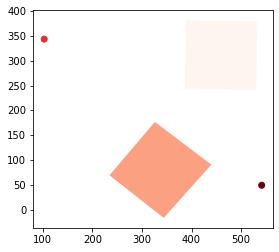

In [9]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)
for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

#cap.release()
#plt.figure()
#plt.imshow(frame)
#plt.show()

#time.sleep(1)
state=0
margin = 40
switch_next=0
path_iter=1
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 3->2
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 2->3 
y = [0,0]          # powers given to motor wheels

#init des variables Kalman, et visu de la trace
KF = ExtendedKalmanFilterAstolfi()
KF.set_time_stamp(time.time())

sensor_package = []
kalman_pos = []

coordThym = []
coordKalm = []

while (cap.isOpened()):
    _, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #final=vis.img_calibration(img, corner_coord)
    #img= cv2.flip(img, 0)
    if(state==0):
        corner_coord=vis.find_corners(img)
        final=vis.img_calibration(img, corner_coord)
        init=initialisation(final)
        path=glob.global_pathplanning(init[0],init[1],init[2],margin)
        
        init_pos = [init[0][0], init[0][1]]
        
        KF.init_state_vector(init_pos[0],init_pos[1],0,0,0,0,0,0)   #xxx a rendre plus joli
        angle_kalman = 0
        state=2
    #if state==1:
     #   time.sleep(6)
      #  print("time sleep over")
       # _, frame1 = cap.read()
        #plt.figure()
        #plt.imshow(frame1)
        #plt.show()
        #img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        #state=2
    if (state==2):
        final=vis.img_calibration(img, corner_coord)
        #plt.figure()
        #plt.imshow(final1)
        #plt.show()
        pos_thym=vis.detectThymio(final)[0]
        angle_thym=vis.directionThymio(final)
        
        vit_roue_droite = ctrl.read_motors_speed(node,client)[1]#xxx droite ou gauche a verifier
        vit_roue_gauche = ctrl.read_motors_speed(node,client)[0]#droite ou gauche a verifier
        sensor_package = [pos_thym[0], pos_thym[1], angle_thym, vit_roue_droite, vit_roue_gauche]
 #       print(sensor_package)
#       a modifier (augmenter pour etre plus souple)
        if(bool(angle_thym)):
            if(abs(angle_thym-angle_kalman)>0.4):
                print("trop grande différence d'angle detectée")
                sensor_package = [None, None, None, vit_roue_droite, vit_roue_gauche]
            else:
                print("différence d'angle correcte")
        E = kalman_step_complet(sensor_package,KF)
        kalman_pos = [E[0], E[1]]
        kalman_pos = np.squeeze(np.asarray(kalman_pos))
 #       print("kalman pos: {}".format(kalman_pos))
        print("angle from camera: {}".format(sensor_package[2]))

        print(type(kalman_pos[0]))
        angle_kalman=E[2]
        angle_kalman = np.squeeze(np.asarray(angle_kalman[0]))
 #       print("kalman angle: {}".format(angle_kalman))
        
        #print(pos_thym)
        #print(angle_thym)
        y = [60,60]
        ctrl.set_motors(y[0],y[1],node)
        
    #    switch_next=astolfi(kalman_pos,path[path_iter],angle_kalman,node)
        if(switch_next==1):
            path_iter=path_iter+1
            print("path iter ",path_iter)
            if(path_iter==len(path)):
                ctrl.stopmotors(node)
                print("finish")
                state=4
                
        #local avoidance
        # get the proximity sensors values and obstacle update
        #prox_horizontal = ctrl.read_prox_sensors(node,client)
        #obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        # update the state and speed motors values
        #state = local.update_state(state,obstThrL,obstThrH, obst)  
    if(state==3):
   #     print("local_nav")
        prox_horizontal = ctrl.read_prox_sensors(node,client)
        obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        state = local.update_state(state,obstThrL,obstThrH, obst)
  #      print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
   #     print("y ",y)
        ctrl.set_motors(y[0],y[1],node)
    if state==4:
        break
    vis.printGlobalPath(path, final)
   # printThymio(pos_thym, coordThym)
 #   print(kalman_pos)
 #   print(coordKalm)
    printThymioKalm(kalman_pos,coordKalm)
    cv2.imshow("results", final)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
#cv2.destroyAllWindows()

In [ ]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)
for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

#cap.release()
#plt.figure()
#plt.imshow(frame)
#plt.show()

#time.sleep(1)
state=0
margin = 40
switch_next=0
path_iter=1
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 3->2
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 2->3 
y = [0,0]          # powers given to motor wheels

#init des variables Kalman, et visu de la trace
KF = ExtendedKalmanFilterAstolfi()
KF.set_time_stamp(time.time())

sensor_package = []
kalman_pos = []

coordThym = []
coordKalm = []

while (cap.isOpened()):
    _, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #final=vis.img_calibration(img, corner_coord)
    #img= cv2.flip(img, 0)
    if(state==0):
        corner_coord=vis.find_corners(img)
        final=vis.img_calibration(img, corner_coord)
        init=initialisation(final)
        path=glob.global_pathplanning(init[0],init[1],init[2],margin)
        
        init_pos = [init[0][0], init[0][1]]
        
        KF.init_state_vector(init_pos[0],init_pos[1],1.7,0,0,0,0,0)   #xxx a rendre plus joli
        angle_kalman = 1.7 
        state=2
    #if state==1:
     #   time.sleep(6)
      #  print("time sleep over")
       # _, frame1 = cap.read()
        #plt.figure()
        #plt.imshow(frame1)
        #plt.show()
        #img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        #state=2
    if (state==2):
        final=vis.img_calibration(img, corner_coord)
        #plt.figure()
        #plt.imshow(final1)
        #plt.show()
        pos_thym=vis.detectThymio(final)[0]
        angle_thym=vis.directionThymio(final)
        
        vit_roue_droite = ctrl.read_motors_speed(node,client)[1]#xxx droite ou gauche a verifier
        vit_roue_gauche = ctrl.read_motors_speed(node,client)[0]#droite ou gauche a verifier
        sensor_package = [pos_thym[0], pos_thym[1], angle_thym, vit_roue_droite, vit_roue_gauche]
 #       print(sensor_package)
        if(bool(angle_thym)):
            if(abs(angle_thym-angle_kalman)>0.4):
                print("trop grande différence d'angle detectée")
                sensor_package = [None, None, None, vit_roue_droite, vit_roue_gauche]
            else:
                print("différence d'angle correcte")
        E = kalman_step_complet(sensor_package,KF)
        kalman_pos = [E[0], E[1]]
        kalman_pos = np.squeeze(np.asarray(kalman_pos))
 #       print("kalman pos: {}".format(kalman_pos))
        print(type(kalman_pos[0]))
        angle_kalman=E[2]
        angle_kalman = np.squeeze(np.asarray(angle_kalman[0]))
 #       print("kalman angle: {}".format(angle_kalman))
        
        #print(pos_thym)
        #print(angle_thym)
        #y = [50,50]
        #ctrl.set_motors(y[0],y[1],node)
        switch_next=astolfi(kalman_pos,path[path_iter],angle_kalman,node)
        if(switch_next==1):
            path_iter=path_iter+1
            print("path iter ",path_iter)
            if(path_iter==len(path)):
                ctrl.stopmotors(node)
                print("finish")
                state=4
                
        #local avoidance
        # get the proximity sensors values and obstacle update
        #prox_horizontal = ctrl.read_prox_sensors(node,client)
        #obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        # update the state and speed motors values
        #state = local.update_state(state,obstThrL,obstThrH, obst)  
    if(state==3):
   #     print("local_nav")
        prox_horizontal = ctrl.read_prox_sensors(node,client)
        obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        state = local.update_state(state,obstThrL,obstThrH, obst)
  #      print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
   #     print("y ",y)
        ctrl.set_motors(y[0],y[1],node)
    if state==4:
        break
    vis.printGlobalPath(path, final)
   # printThymio(pos_thym, coordThym)
 #   print(kalman_pos)
 #   print(coordKalm)
    printThymioKalm(kalman_pos,coordKalm)
    cv2.imshow("results", final)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
#cv2.destroyAllWindows()

frame 0
frame 1
frame 2
frame 3
frame 4


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 496.98it/s]


Visibility graph points:  [[Point(387.30, 244.63), Point(389.71, 381.62), Point(533.70, 379.37), Point(531.29, 242.38)], [Point(128.76, 193.49), Point(125.24, 378.47), Point(282.24, 380.51), Point(285.76, 195.53)], [Point(347.08, -15.42), Point(235.92, 70.27), Point(329.93, 178.03), Point(441.08, 90.04)]] 

Shortest path distance: 603.0510151980382 

0    POLYGON ((387.303 244.631, 389.706 381.619, 53...
1    POLYGON ((128.764 193.487, 125.241 378.474, 28...
2    POLYGON ((347.078 -15.419, 235.918 70.267, 329...
0                              POINT (103.630 344.568)
1                              POINT (128.764 193.487)
2                              POINT (329.927 178.033)
3                               POINT (542.522 50.064)
dtype: geometry 

path  0    POINT (103.630 344.568)
1    POINT (128.764 193.487)
2    POINT (329.927 178.033)
3     POINT (542.522 50.064)
dtype: geometry
elements:  2
elements:  2


différence d'angle correcte
Vitesses droite / gauche -------------------
0.0
0.0
--------------------------------------------
temps entre samples:  0.2529726028442383
state avant predict
[[103.63012695]
 [344.56790161]
 [  1.7       ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
state apres predict
[[103.63012695]
 [344.56790161]
 [  1.7       ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
0.0
0.0
--------------------------------------------
temps entre samples:  0.18102264404296875
state avant predict
[[ 38.17145477]
 [338.1604456 ]
 [  1.64095639]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
state apres predict
[[ 38.17145477]
 [338.1604456 ]
 [  1.64095639]
 [  0.        ]
 

elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
30.54670111028583
43.437525338561784
--------------------------------------------
temps entre samples:  0.14463567733764648
state avant predict
[[ 4.43172194e+01]
 [ 2.96273638e+02]
 [ 1.07971752e+00]
 [ 3.05467011e+01]
 [ 4.34375253e+01]
 [-1.27321721e+01]
 [-4.86504212e+01]
 [-1.50302530e-01]]
state apres predict
[[ 4.24756930e+01]
 [ 2.89237051e+02]
 [ 1.05797841e+00]
 [ 3.05467011e+01]
 [ 4.34375253e+01]
 [-1.77763392e+01]
 [-5.14558482e+01]
 [-1.43231380e-01]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
Vitesses droite / gauche -------------------
29.681361010774857
42.10456610584536
--------------------------------------------
temps entre samples:  0.1378803253173828
state avant predict
[[ 4.57698583e+01]
 [ 2.92447949e+02]
 [ 1.04534186e+00]
 [ 2.96813610e+01]
 [ 4.2

In [ ]:
type(kalman_pos)
round(-10.939384)
print(kalman_pos)
print(round(kalman_pos[0]))
round(-294992929.8484)

In [ ]:
print("kalman pos: ",kalman_pos)
print("kalman pos: ", np.asarray(kalman_pos[0][0]))
print("kalman pos: ", np.squeeze(np.asarray(kalman_pos))[0])

In [10]:
ctrl.stopmotors(node)


In [ ]:
test=[[None,None],[None,None]]
if bool(not test[0][0]):
    print("zeub")

In [ ]:
def detectThymio(imgRGB):
    pts=[]
    #p1 is the big circle and p2 the little
    p1=[]
    p2=[]
    lower=np.array([10,30,30])
    upper=np.array([40,255,255])
    nb_iterations=1
    img_hsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower, upper)
    img_hsv = cv2.blur(img_hsv,(7,7))
    mask = cv2.erode(mask, None, iterations = nb_iterations)
    mask = cv2.dilate(mask, None, iterations = nb_iterations)
    elements,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(elements))
    if len(elements) > 0:
        #sorting the detected contours by descending area size
        elements.sort(key=cv2.contourArea, reverse=True)
        #finding big circle
        c=elements[0]
        ((x,y),rayon) = cv2.minEnclosingCircle(c)
        #finding little circle
        c2=elements[1]
        ((x2,y2),rayon2) = cv2.minEnclosingCircle(c2)
        p1=[x,y]
        p2=[x2,y2]
        pts=[p1,p2]
    return pts

#print(detectThymio(final))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
corner_coord=vis.find_corners(frame)
final=vis.img_calibration(frame, corner_coord)
print(detectThymio(final)[0])

In [ ]:
print(init)

In [ ]:
# Navigation initialisation
checkp=1           # goal checkpoint
actual_angle=0     # angle to xy axis
y = [0,0]          # powers given to motor wheels

# FSM initialisation
state = 0          # States FSM 0=global nav, 1=local nav
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 1->0
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 0->1  

while True:
    
    # get the proximity sensors values and obstacle update
    prox_horizontal = ctrl.read_prox_sensors(node,client)
    obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
    
    # update the state and speed motors values
    state = local.update_state(state,obstThrL,obstThrH, obst)
    y = ctrl.read_motors_speed(node,client)
    
    print("state", state)

    if state == 0:
        
        """
        # With positon estimation when vision and/or kalman ready
        
        actual,angle = getting_vis()
        pred_pos,pred_angle = kalman(actual, angle)
        
        actual_pos=pred_pos
        actual_angle=pred_angle
        
        if actual_pos == checkpoints[checkp]: # other option: if (actual_pos - checkpoints[checkp]) < error
            checkp=checkp+1
        goal_pos=checkpoints[checkp]
        
        y = ctrl.astolfi2(actual_pos, goal_pos, actual_angle, node)
        
        """
        y = [50,50]
        ctrl.set_motors(y[0],y[1],node)

    elif state == 1:
        print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
        print("y ",y)
        ctrl.set_motors(y[0],y[1],node)

ctrl.stopmotors(node)

In [10]:
ctrl.stopmotors(node)
